In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("./titanic.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

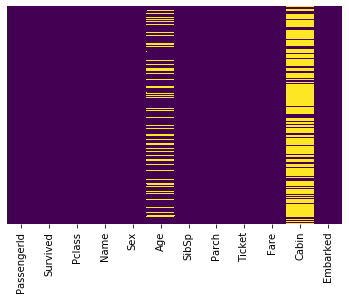

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

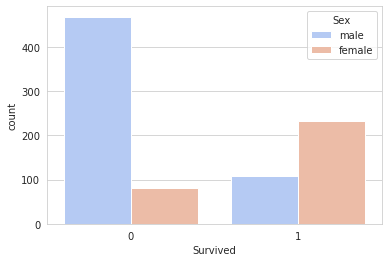

In [8]:
sns.countplot(train['Survived'], hue=train['Sex'], palette='coolwarm')

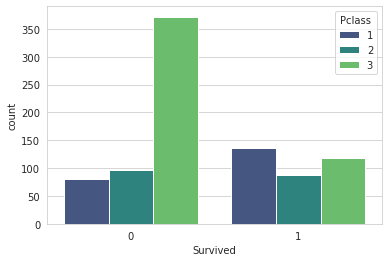

In [9]:
sns.countplot(train['Survived'], hue=train['Pclass'], palette='viridis')

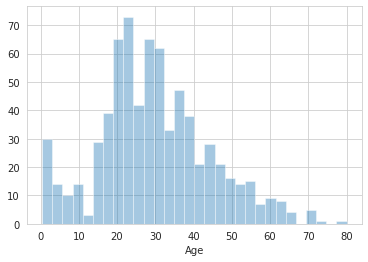

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

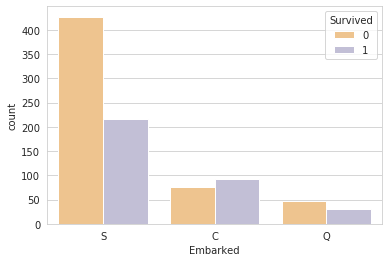

In [11]:
sns.countplot(x='Embarked', data=train, hue='Survived', palette='PuOr')

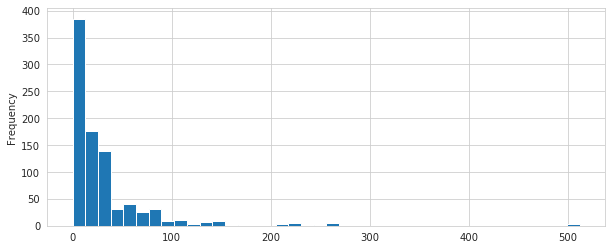

In [12]:
train['Fare'].plot.hist(bins=40, figsize=(10, 4))

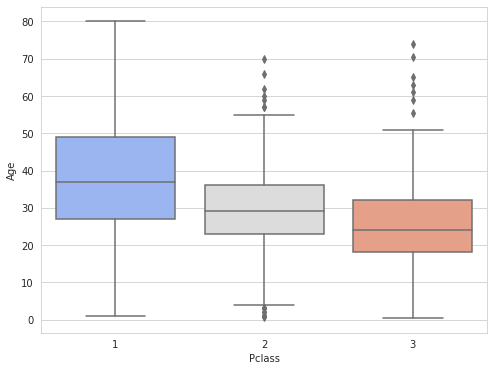

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=train, palette='coolwarm')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [16]:
train.drop('Cabin', axis=1, inplace=True)

In [17]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
# train['Sex'] = train['Sex'].apply(lambda x: 0 if x == "female" else 1)


In [18]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [20]:
train = pd.concat([train, sex, embarked, pclass], axis=1)

In [21]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Pclass'], axis = 1, inplace=True)

In [22]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Test Split

In [23]:
X = train[['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]]
y = train['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logreg = LogisticRegression(max_iter=1000)

In [28]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred = logreg.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
cm = confusion_matrix(y_test, pred)

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       169
           1       0.84      0.69      0.76       126

    accuracy                           0.81       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [33]:
accuracy = (cm[0][0] + cm[1][1])/len(X_test)
accuracy

0.8101694915254237